In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_file = pd.read_csv(city_data_to_load)
ride_file = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
joint_dataset = city_file.merge(ride_file, on = 'city')
# Display the data table for preview
joint_dataset = joint_dataset[['city', 'date', 'fare', 'ride_id', 'driver_count', 'type']]

joint_dataset.head(10)

,city,date,fare,ride_id,driver_count,type
0,Richardfort,2018-02-24 08:40:38,13.93,5628545007794,38,Urban
1,Richardfort,2018-02-13 12:46:07,14.00,910050116494,38,Urban
2,Richardfort,2018-02-16 13:52:19,17.92,820639054416,38,Urban
3,Richardfort,2018-02-01 20:18:28,10.26,9554935945413,38,Urban
4,Richardfort,2018-04-17 02:26:37,23.00,720020655850,38,Urban
5,Richardfort,2018-04-21 03:44:04,9.54,3698147103219,38,Urban
6,Richardfort,2018-02-03 00:14:26,29.04,4982665519010,38,Urban
7,Richardfort,2018-02-08 15:50:12,16.55,2270463070874,38,Urban
8,Richardfort,2018-04-03 15:07:34,40.77,9496210735824,38,Urban
9,Richardfort,2018-02-19 14:09:20,27.11,8690324801449,38,Urban


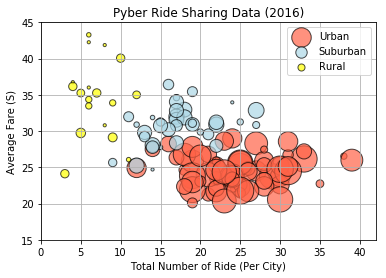

## Bubble Plot of Ride Sharing Data

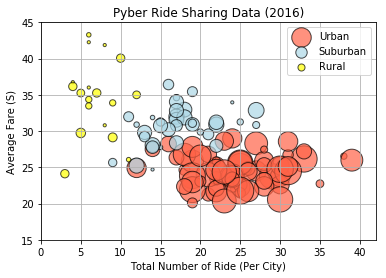

In [3]:
# Obtain the x and y coordinates for each of the three city types
#Urban
urban_df = joint_dataset.loc[joint_dataset['type'] == 'Urban']
urban_df = urban_df[['driver_count', 'ride_id', 'city', 'fare']]
average_fare = round(urban_df.groupby(urban_df['city']).mean(),2)
average_fare = average_fare[['fare', 'driver_count']]
ride_id = pd.DataFrame({'Ride ID': urban_df['city'].value_counts()})
urban_scatter = average_fare.join(ride_id)
urban_scatter = urban_scatter.rename(columns = {'fare': 'average fare',
                                               'driver_count': 'driver count'})




#Suburban
suburban_df = joint_dataset.loc[joint_dataset['type'] == 'Suburban']
suburban_df = suburban_df[['driver_count', 'ride_id', 'city', 'fare']]
average_fare2 = round(suburban_df.groupby(suburban_df['city']).mean(),2)
average_fare2 = average_fare2[['fare', 'driver_count']]
ride_id2 = pd.DataFrame({'Ride ID': suburban_df['city'].value_counts()})
suburban_scatter = average_fare2.join(ride_id2)
suburban_scatter = suburban_scatter.rename(columns = {'fare': 'average fare',
                                                      'driver_count': 'driver count'})
    
#Rural
rural_df = joint_dataset.loc[joint_dataset['type'] == 'Rural']
rural_df = rural_df[['driver_count', 'ride_id', 'city', 'fare']]
average_fare3 = round(rural_df.groupby(rural_df['city']).mean(),2)
average_fare3 = average_fare3[['fare', 'driver_count']]
ride_id3 = pd.DataFrame({'Ride ID': rural_df['city'].value_counts()})
rural_scatter = average_fare3.join(ride_id3)
rural_scatter = rural_scatter.rename(columns = {'fare': 'average fare',
                                                      'driver_count': 'driver count'})

# Build the scatter plots for each city types
ax = urban_scatter.plot.scatter(x = 'Ride ID',y= 'average fare',
                                  marker="o", color="tomato",
                                  s = urban_scatter['driver count']*10, label = "Urban",
                                  alpha = 0.7, stacked = False, edgecolors = 'black')
ax = suburban_scatter.plot.scatter(x = 'Ride ID',y= 'average fare',
                                   marker="o", color="lightblue",label = "Suburban",
                                   s = suburban_scatter['driver count']*10,
                                   alpha = 0.7, stacked = False, 
                                   edgecolors = 'black', ax = ax)

rural_scatter.plot.scatter(x = 'Ride ID',y= 'average fare',
                           marker="o", color="yellow",label = "Rural",
                           s = rural_scatter['driver count']*10,
                           alpha = 0.7, stacked = False, edgecolors = 'black', ax = ax)


plt.grid()


# Incorporate the other graph properties
plt.xlim(0, 42)
plt.ylim(15, 45)



# Create a legend
plt.legend(loc="best")


# Incorporate a text label regarding circle size
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Ride (Per City)")
plt.ylabel("Average Fare (S)")


# Save Figure
plt.savefig("../Images/PyberRideSharingData(2016).png")
plt.show()

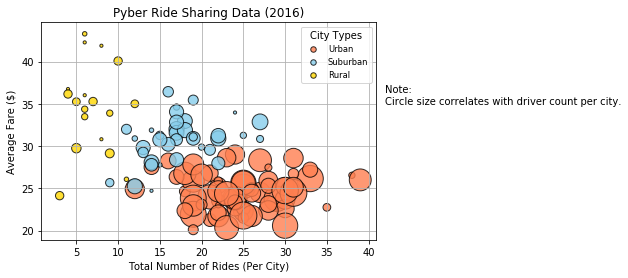

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

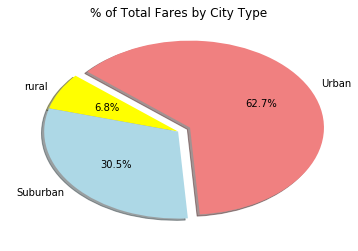

In [4]:
# Calculate Type Percents
urban_df = joint_dataset.loc[joint_dataset['type'] == 'Urban']
urban_count = urban_df['fare'].sum()

suburban_df = joint_dataset.loc[joint_dataset['type'] == 'Suburban']
suburban_count = suburban_df['fare'].sum()

rural_df = joint_dataset.loc[joint_dataset['type'] == 'Rural']
rural_count = rural_df['fare'].sum()

sizes = [ rural_count, suburban_count,urban_count]
labels = ['rural','Suburban', 'Urban']
colors = ['yellow', 'lightblue', 'lightcoral']
explode = (0, 0, 0.1)

# Build Pie Chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Fares by City Type")


# Save Figure
plt.savefig("../Images/%ofTotalFaresByCityType.png")
plt.show()

In [5]:
# Show Figure
plt.show()

## Total Rides by City Type

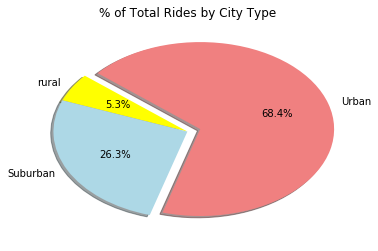

In [6]:
# Calculate Type Percents
urban_df = joint_dataset.loc[joint_dataset['type'] == 'Urban']
urban_count = urban_df['type'].count()

suburban_df = joint_dataset.loc[joint_dataset['type'] == 'Suburban']
suburban_count = suburban_df['type'].count()

rural_df = joint_dataset.loc[joint_dataset['type'] == 'Rural']
rural_count = rural_df['type'].count()

sizes = [ rural_count, suburban_count,urban_count]
labels = ['rural','Suburban', 'Urban']
colors = ['yellow', 'lightblue', 'lightcoral']
explode = (0, 0, 0.1)

# Build Pie Chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")


# Save Figure
plt.savefig("../Images/%ofTotalRidesByCityType.png")
plt.show()

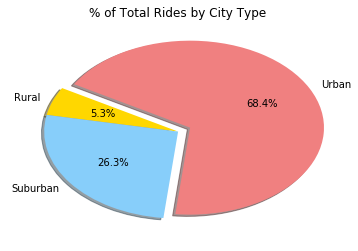

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

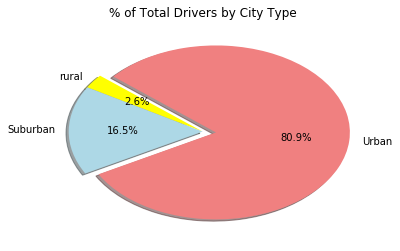

In [8]:
# Calculate Type Percents
urban_df = city_file.loc[city_file['type'] == 'Urban']
urban_count = urban_df['driver_count'].sum()

suburban_df = city_file.loc[city_file['type'] == 'Suburban']
suburban_count = suburban_df['driver_count'].sum()

rural_df = city_file.loc[city_file['type'] == 'Rural']
rural_count = rural_df['driver_count'].sum()

sizes = [ rural_count, suburban_count,urban_count]
labels = ['rural','Suburban', 'Urban']
colors = ['yellow', 'lightblue', 'lightcoral']
explode = (0, 0, 0.1)

# Build Pie Chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Drivers by City Type")


# Save Figure
plt.savefig("../Images/%ofTotalDriversByCityType.png")
plt.show()


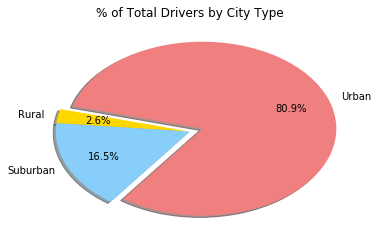

In [6]:
# Show Figure
plt.show()